num of face: 1
rectangles[[(526, 134) (847, 455)]]
0


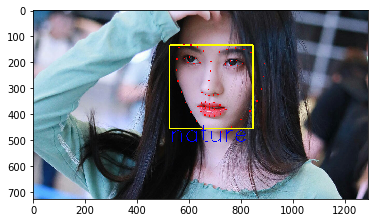

In [10]:
import sys
import os

import cv2
import dlib

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage import io

#input_pict = '/home/leipeng/facepicture/bycyface/ycy.jpg'
input_pict = '/home/leipeng/facepicture/jjy.jpg'


#实例化一个人脸提取器
detector = dlib.get_frontal_face_detector()
#实例化一个人脸特征点提取器
shape_predictor = dlib.shape_predictor("/home/leipeng/cv/shape_predictor_68_face_landmarks.dat")
#读取图片，转换成灰度图片
img = io.imread(input_pict)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

dets = detector(gray_img,1)
print("num of face:",len(dets))
print(dets)
#人脸坐标,只有一个脸
for i, d in enumerate(dets):
    x1 = d.top() if d.top() > 0 else 0
    y1 = d.bottom() if d.bottom() > 0 else 0
    x2 = d.left() if d.left() > 0 else 0
    y2 = d.right() if d.right() > 0 else 0
    
    #切割出人脸            
    face = img[x1:y1,x2:y2]
    print(i)
    #用方框标出人脸
    shape = shape_predictor(gray_img,d)
    cv2.rectangle(img, (x2,x1),(y2,y1), (255,255,0),3)
#标出人脸特征点
    for p in range(68):
        cv2.circle(img,(shape.part(p).x,shape.part(p).y),3,(255,0,0),-1,8)
#        cv2.putText(img, str(p), (shape.part(p).x, shape.part(p).y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255))
#        print(shape.part(p).x,shape.part(p).y)
#    cv2.imshow("lyf.png",img)
#    cv2.waitKey()
#    cv2.destroyAllWindows()

#人脸表情数据
    #人脸宽度
    face_width = d.right() - d.left()
    line_brow_x = []
    line_brow_y = []
    #嘴的宽与高与脸宽之比
    mouth_width = (shape.part(54).x - shape.part(48).x)/face_width
    mouth_hight = (shape.part(66).y - shape.part(62).y)/face_width
    
    #通过眉毛上的10的特征点，分析挑眉的程度或者皱眉的程度
    brow_sum = 0 #高度之和
    frown_sum = 0 #两边眉毛距离之和
    
    for j in range(17,21):
        brow_sum += ((shape.part(j).y - d.top()) +(shape.part(j + 5).y - d.top()))
        frown_sum += shape.part(j + 5).x - shape.part(j).x
        line_brow_x.append(shape.part(j).x)
        line_brow_y.append(shape.part(j).y)
    #拟合出眉毛的倾斜程度
    tmp_x = np.array(line_brow_x)
    tmp_y = np.array(line_brow_y)
    z1 = np.polyfit(tmp_x, tmp_y, 1)#拟合出一次直线
    brow_k = -round(z1[0], 3)#拟合出曲线的斜率，因为计算brow_sum是y-top，所以是反的
    
    #眉毛的宽与高与脸宽之比
    brow_hight = (brow_sum / 10)/face_width
    brow_width = (frown_sum / 5)/face_width
    
    #眼睛的睁开程度
    eye_sum = (shape.part(41).y - shape.part(37).y + shape.part(40).y - shape.part(38).y + 
               shape.part(47).y - shape.part(43).y + shape.part(46).y - shape.part(44).y)
    eye_hight = (eye_sum / 4)/face_width
    
    #开始讨论情况
    if round(mouth_hight >= 0.03):
        if eye_hight >= 0.056:
            cv2.putText(img, "amazing",(int(d.left()/2 + d.right()/2)-len("amazing"),d.bottom()+50),cv2.FONT_HERSHEY_SIMPLEX,5, (0,0,255), 2, 4)
        else:
            cv2.putText(img, "happy", (int(d.left()/2 + d.right()/2)-len("happy"),d.bottom()+50),cv2.FONT_HERSHEY_SIMPLEX, 5, (0,0,255), 2, 4)
    else:
        if brow_k <= -0.3:
            cv2.putText(img, "angry", (int(d.left()/2 + d.right()/2)-len("angry"),d.bottom()+50),cv2.FONT_HERSHEY_SIMPLEX, 5, (0,0,255), 2, 4)
        else:
            cv2.putText(img, "nature", (d.left(),d.bottom()+50),cv2.FONT_HERSHEY_SIMPLEX, 3, (0,0,255), 2, 4)
       
        

            
    plt.imshow(img)
    plt.savefig("jjy.jpg",dpi = 1600)
    plt.show()
            